# Mini Project 5: Random Forest for Feature Importance
### Unit: Building Machine Learning Models with Scikit-learn
### Objective: Employ a random forest to identify important features in predicting wine quality.
### Task: - Download a wine quality dataset. - Use a random forest model to predict wine quality based on chemical properties. - Analyze and rank the importance of different features in the dataset.
### Deliverable: A Jupyter Notebook that includes the model training, feature importance analysis, and conclusions on the influence of various features.


In [1]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

#Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Explanation of the variables
__Fixed Acidity__: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

__Volatile Acidity__: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

__Citric Acid__: found in small quantities, citric acid can add 'freshness' and flavor to wines.

__Residual Sugar__: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.

__Chlorides__: the amount of salt in the wine.

__Free Sulfur Dioxide__: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.

__Total Sulfur Dioxide__: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

__Density__: the density of water is close to that of water depending on the percent alcohol and sugar content.

__pH__: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

__Sulphates__: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

__Alcohol__: this is the percent alcohol content of the wine.

__Quality__: output variable (based on sensory data, score between 3 and 8).

In [3]:
# Check For Missing Values
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
IsNull,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.00000,0.00,0.00,0.0,0.0
IsNa,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.00000,0.00,0.00,0.0,0.0
Duplicate,240.0,240.00,240.0,240.0,240.000,240.0,240.0,240.00000,240.00,240.00,240.0,240.0
Unique,96.0,143.00,80.0,91.0,153.000,60.0,144.0,436.00000,89.00,96.00,65.0,6.0
Min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
Max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8.0


It seems that we have 240 rows duplicated.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Preproccessing

In [5]:
df=data.copy()

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


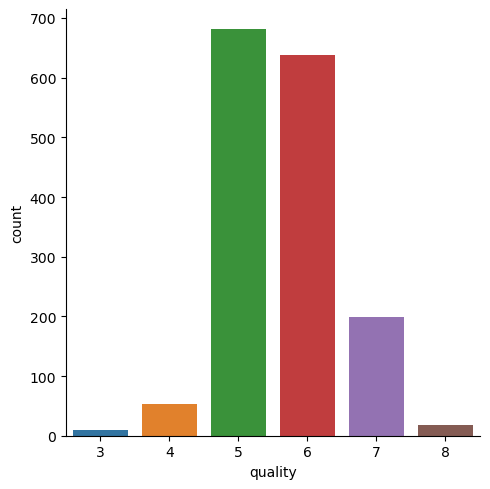

In [9]:
# number of values for each quality
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
plot= sns.catplot(x='quality', data = df, kind = 'count')

In [10]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

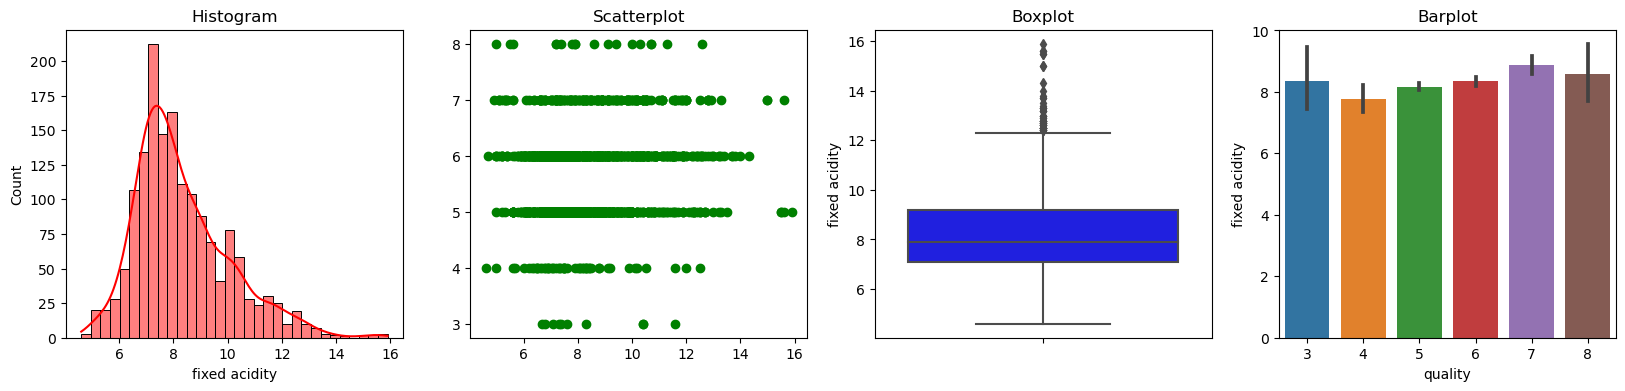

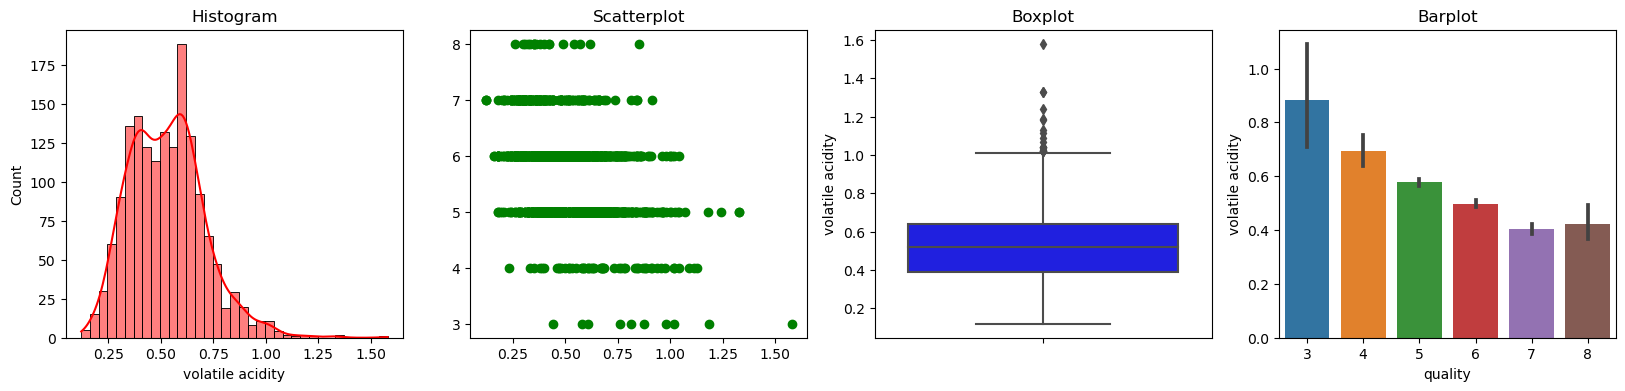

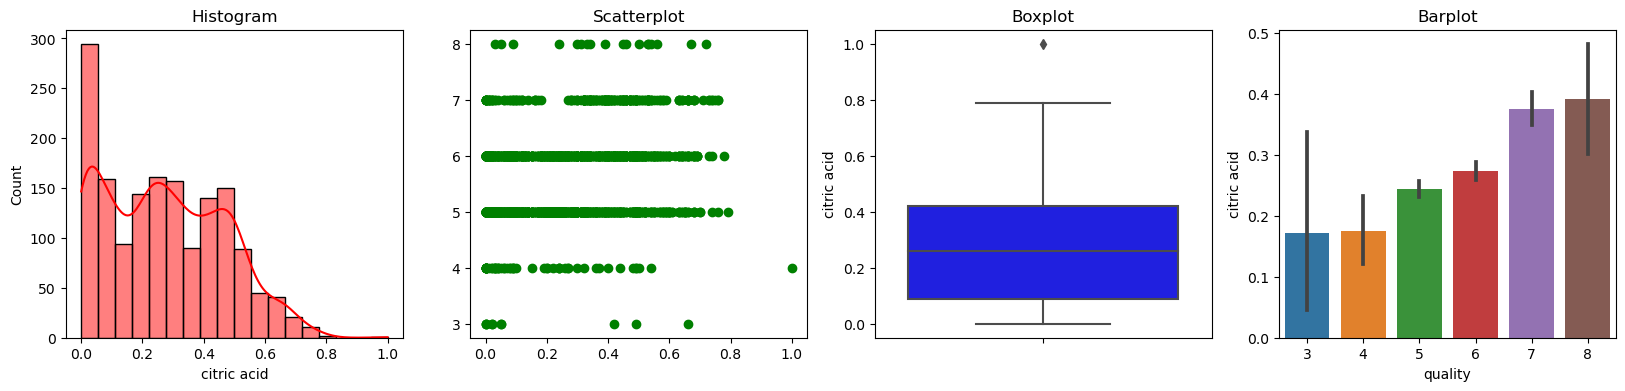

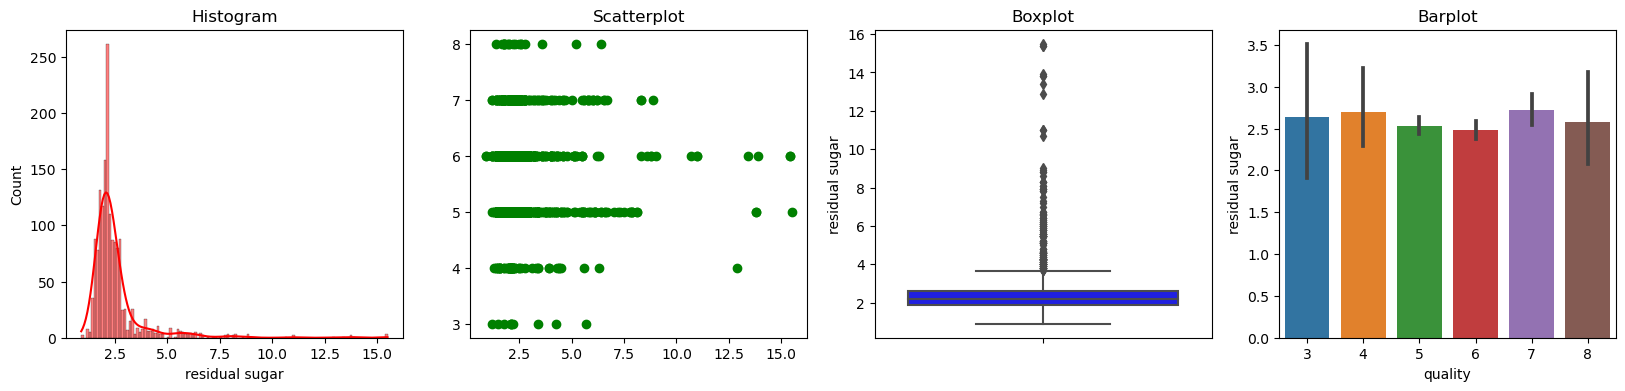

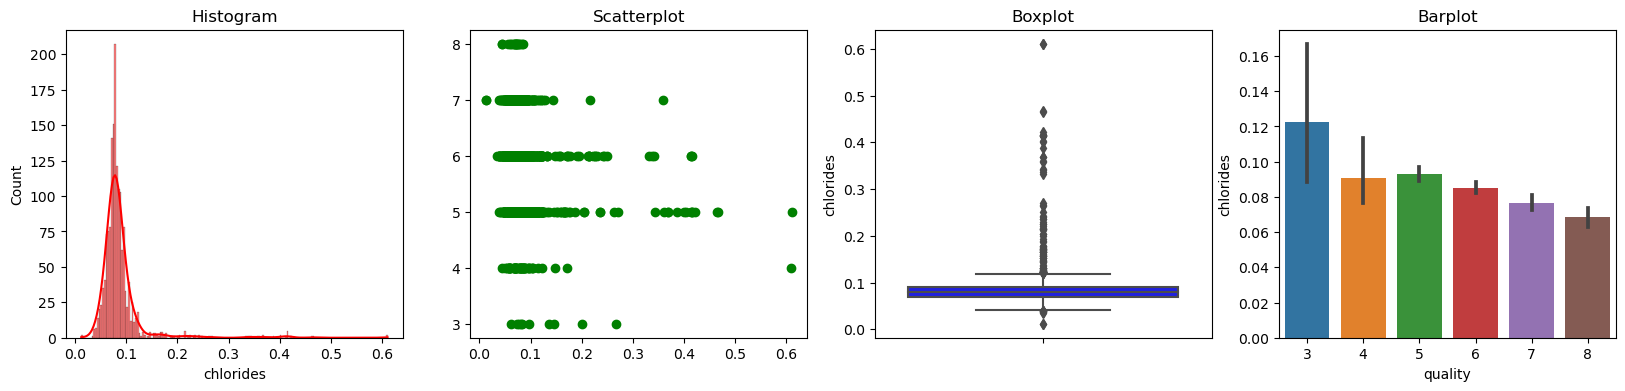

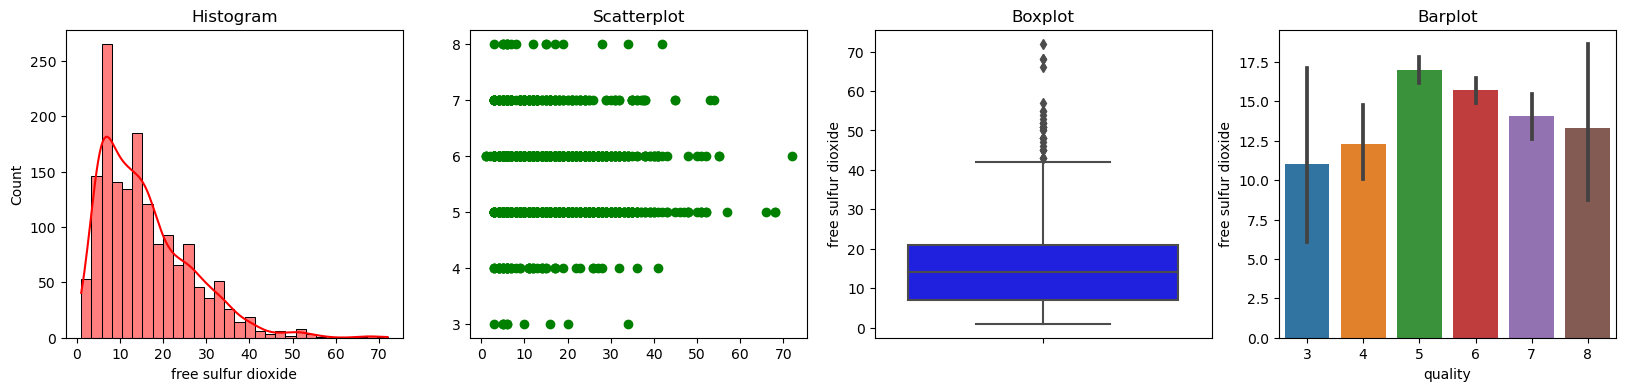

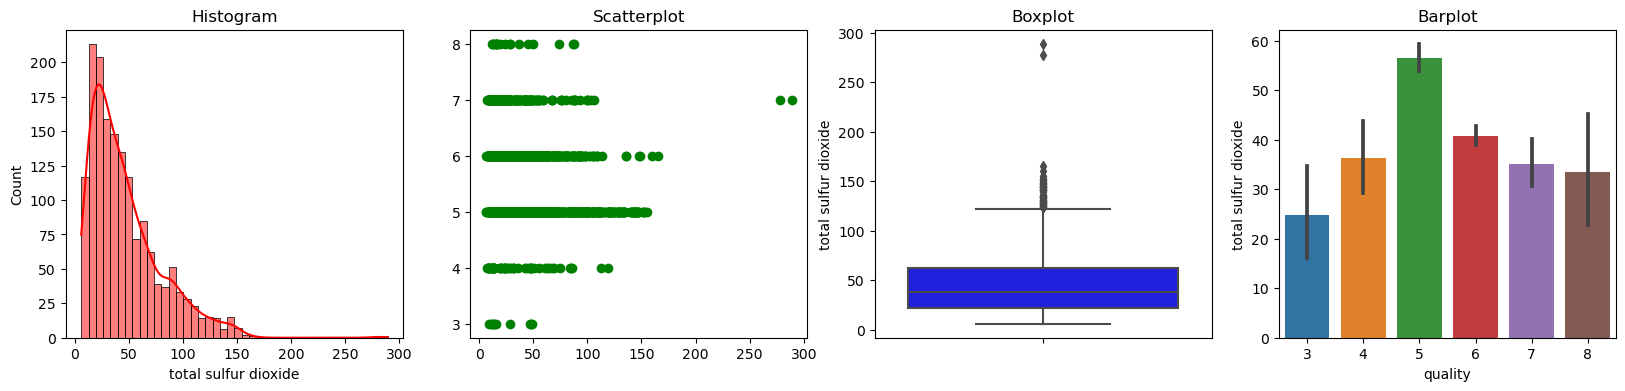

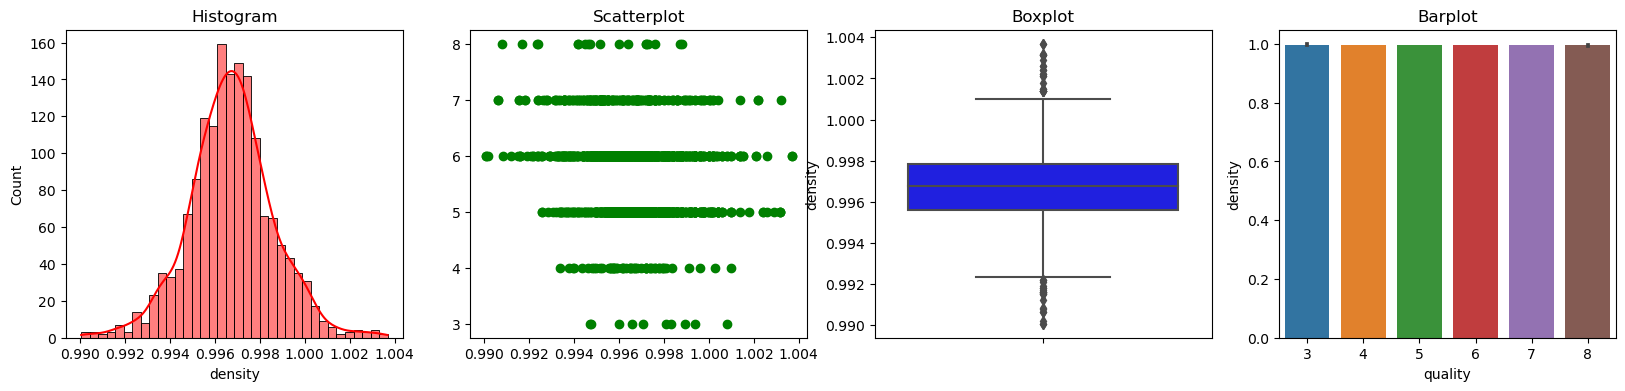

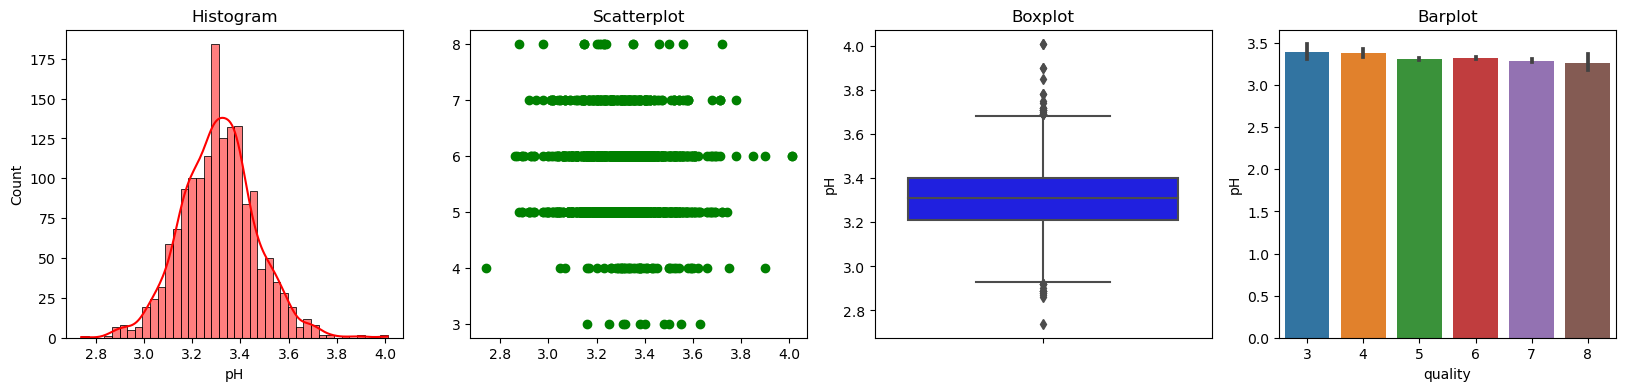

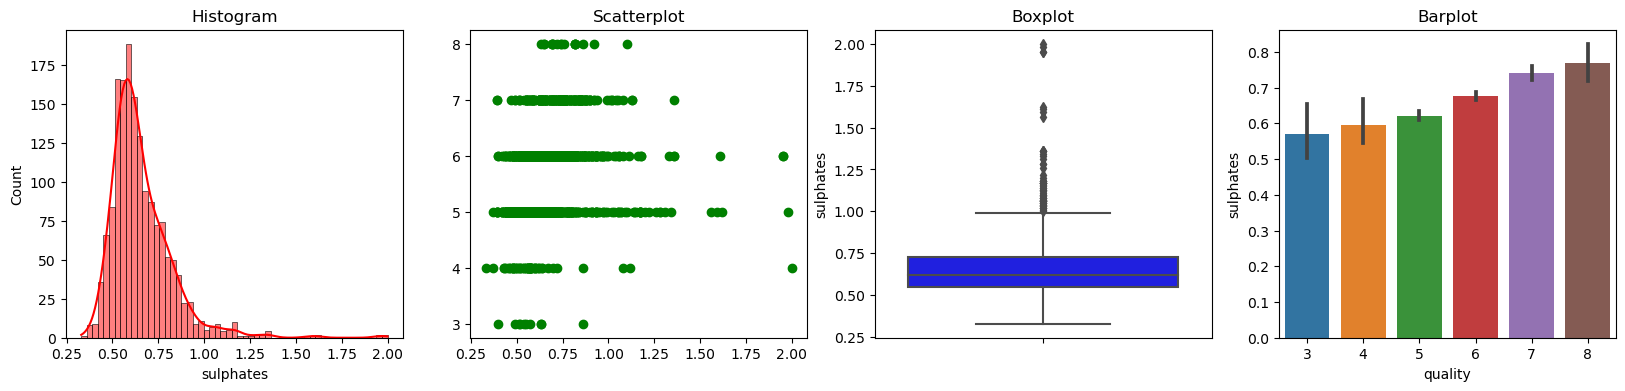

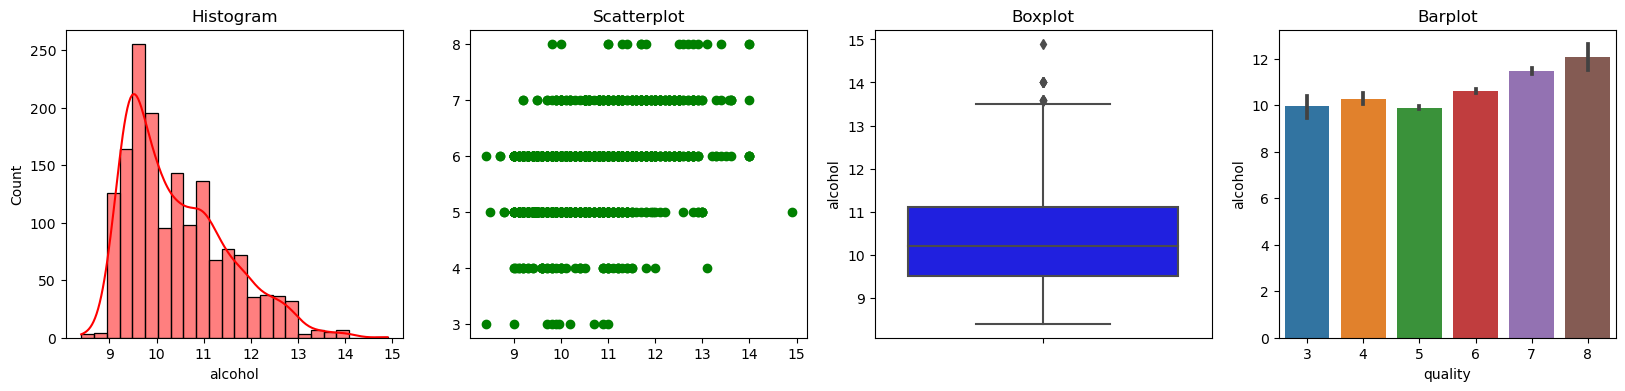

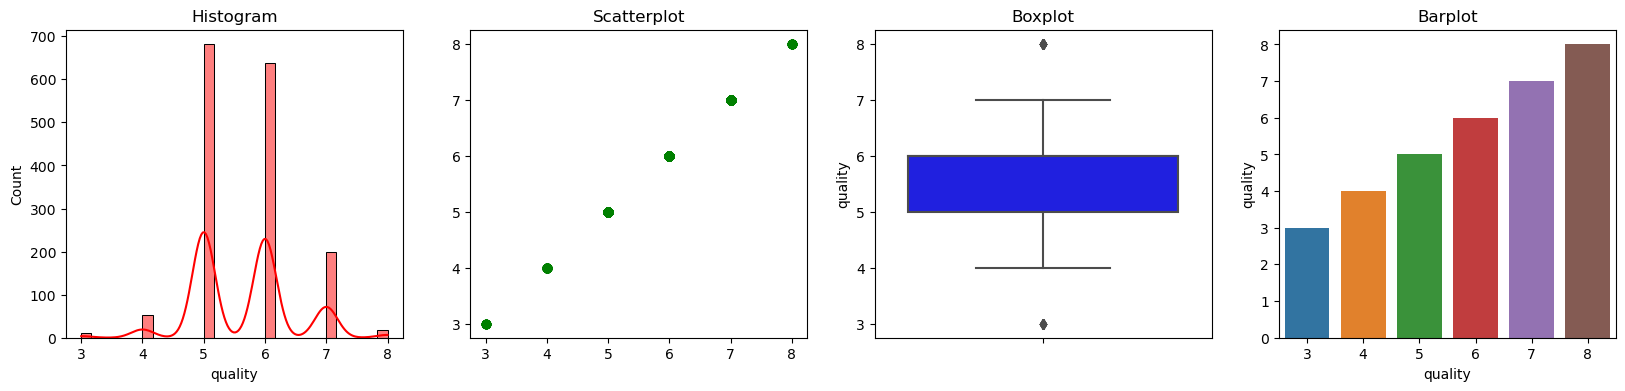

In [11]:
for col in df:
    diagnostic_plots(df,col,'quality')

Things We Understand :
 1. fixed acidity does not give any specification to classify the quality.
 2. its quite a downing trend in the volatile acidity as we go higher the quality.
 3. Composition of citric acid go higher as we go higher in the quality of the win.
 4. Composition of chloride also go down as we go higher in the quality of the wine.
 5. Sulphates level goes higher with the quality of wine.
 6. Alcohol level also goes higher as te quality of wine increases.

There are quite a few outliers in the dataset and thus we will be optimizing them to our desired upper and lower bound values.



In [12]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

In [13]:
df1 = mod_outlier(df)

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\User

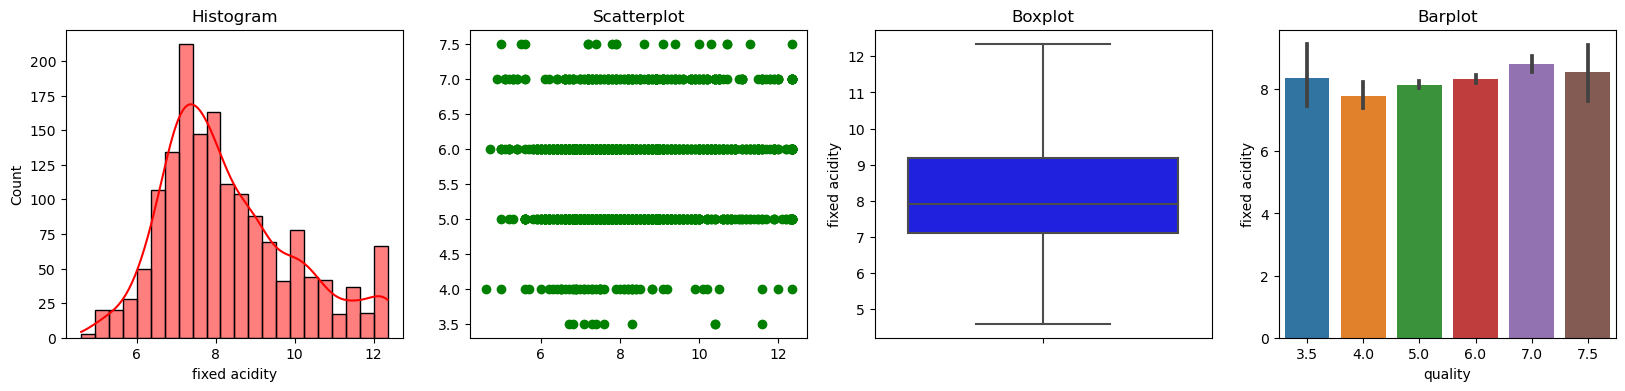

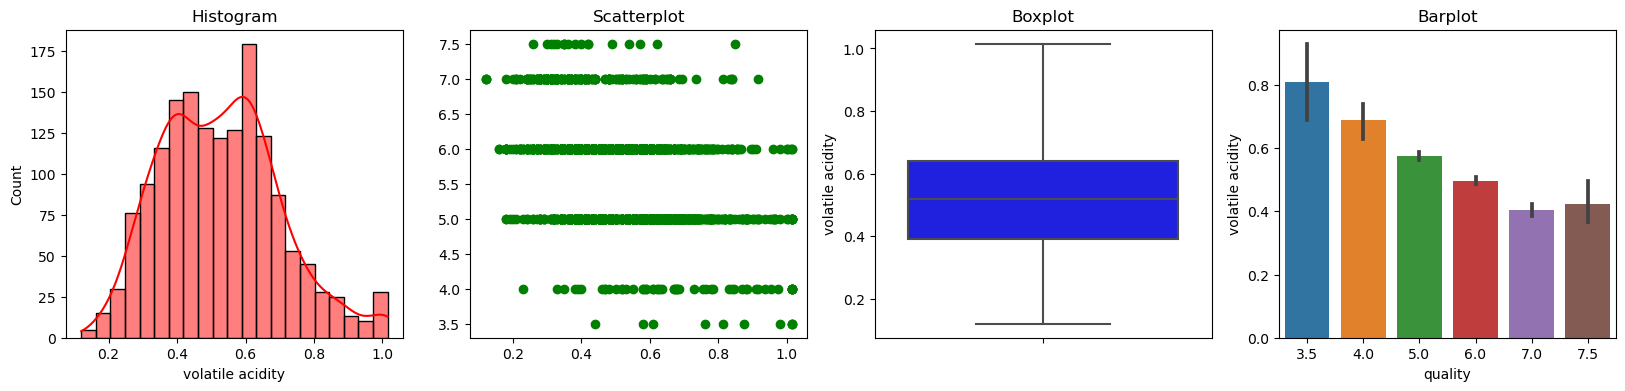

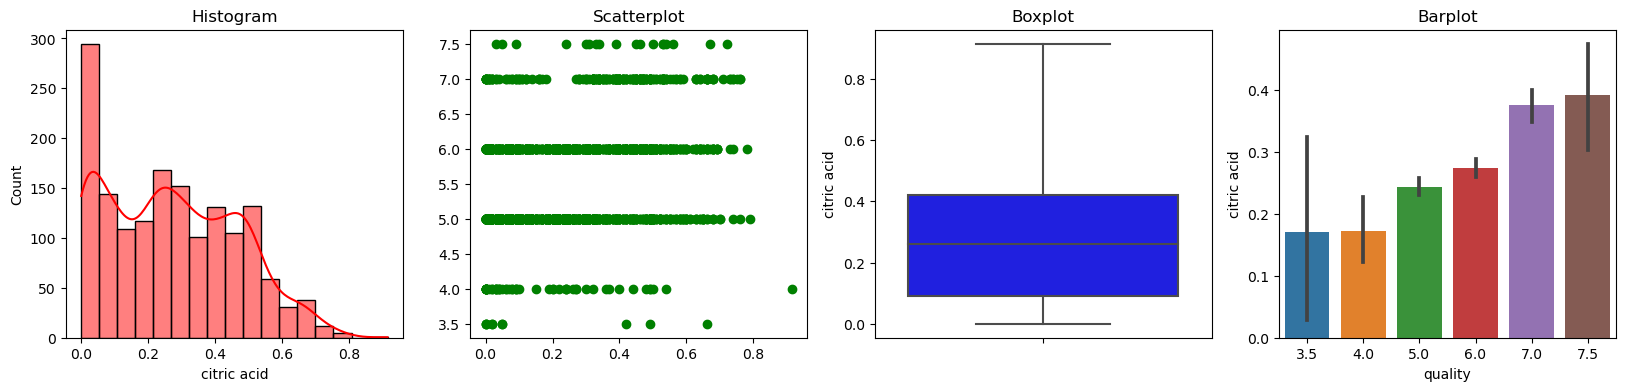

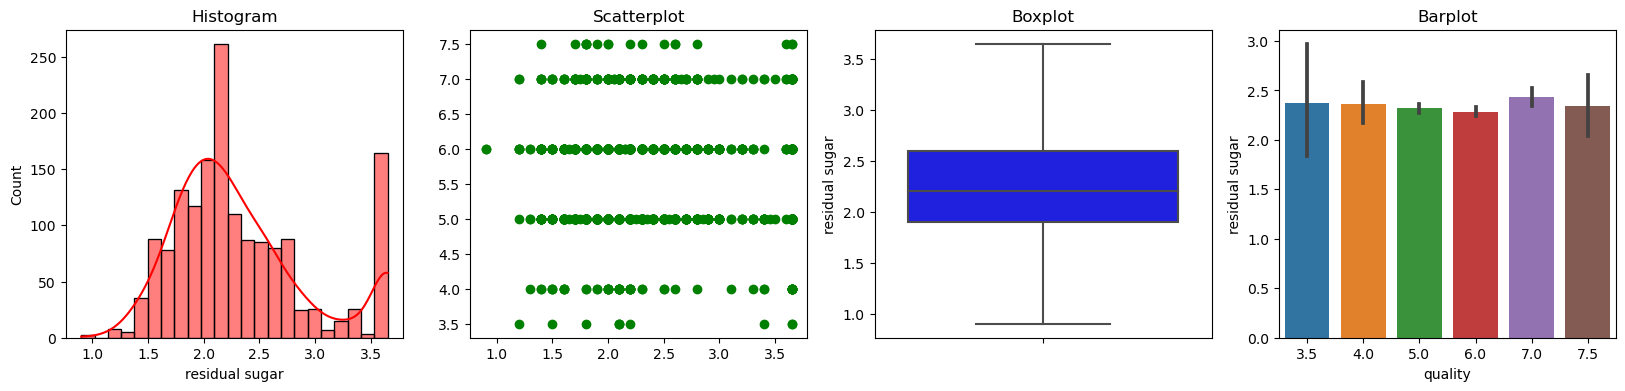

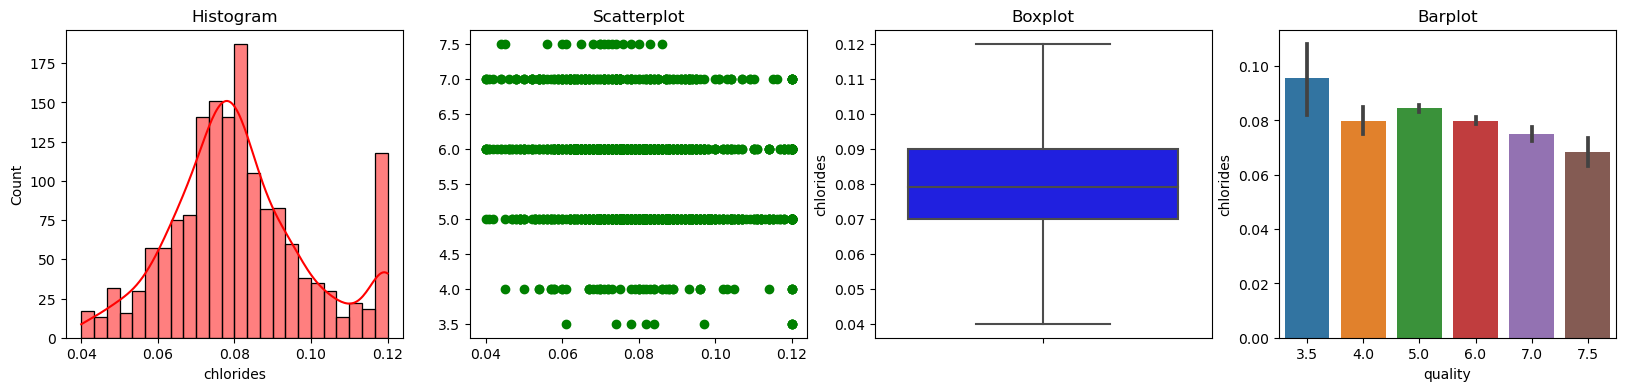

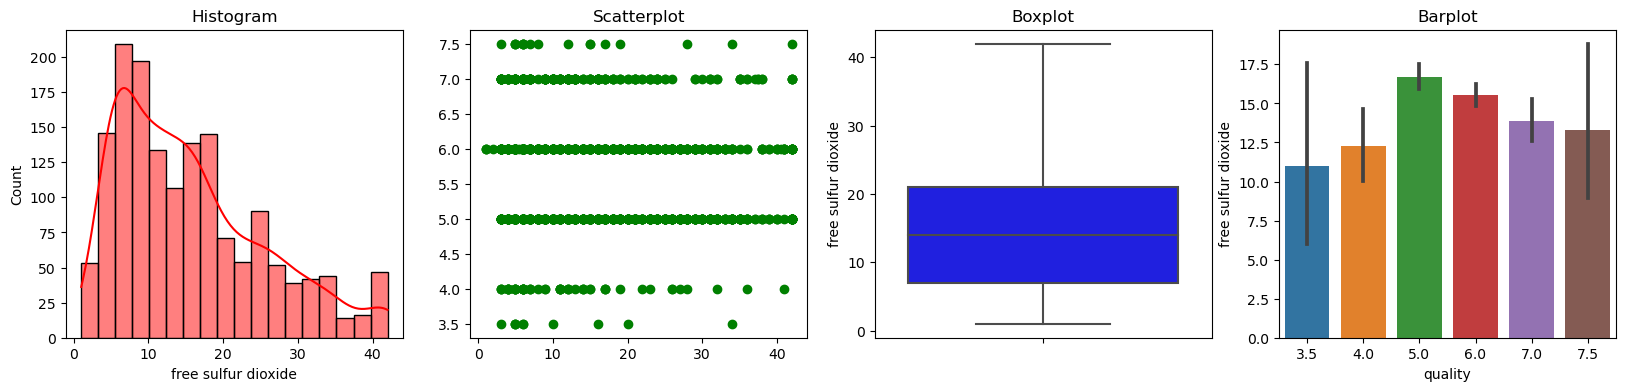

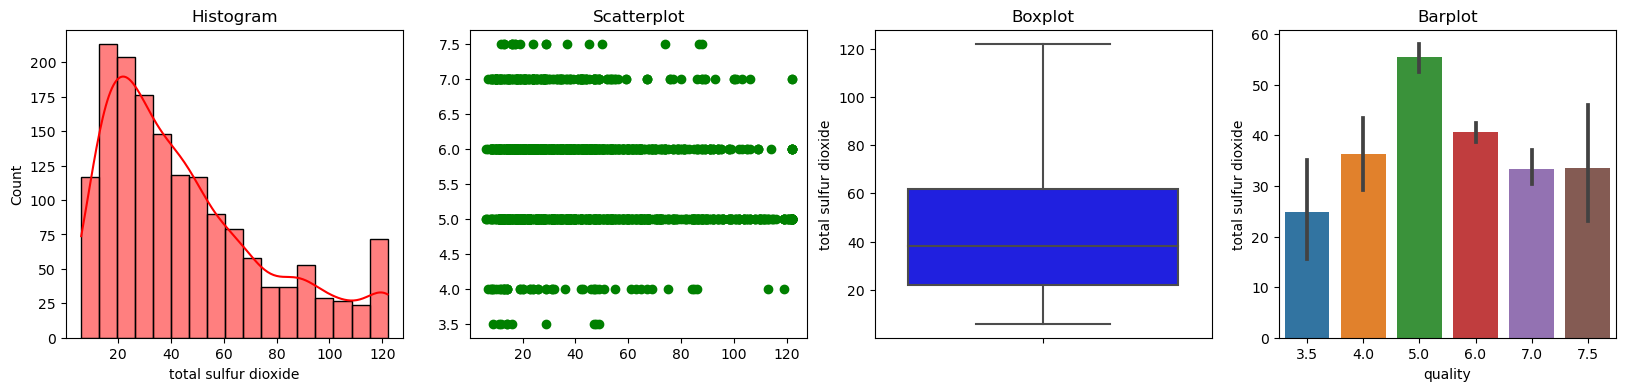

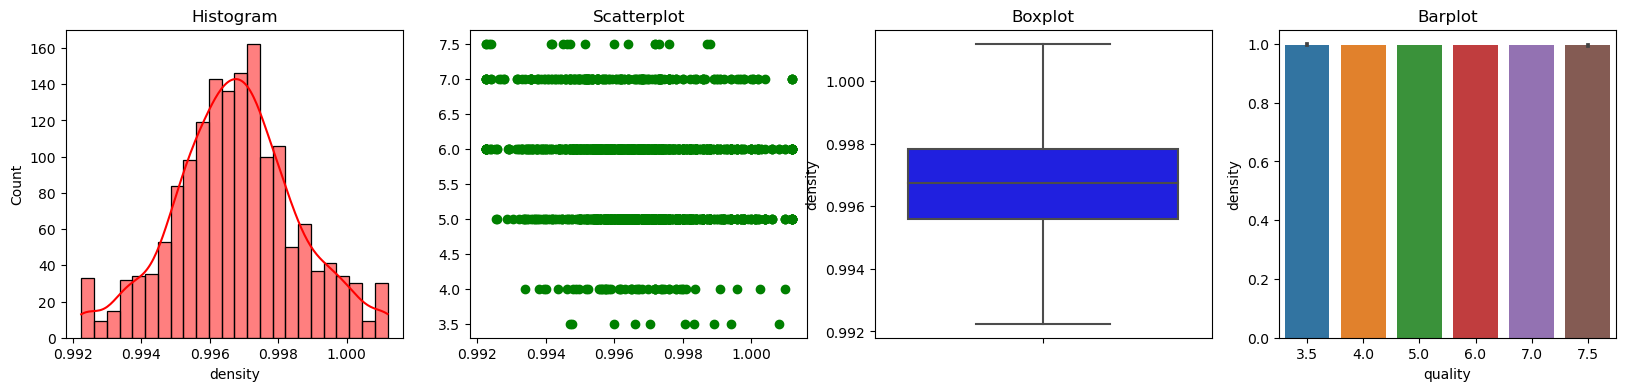

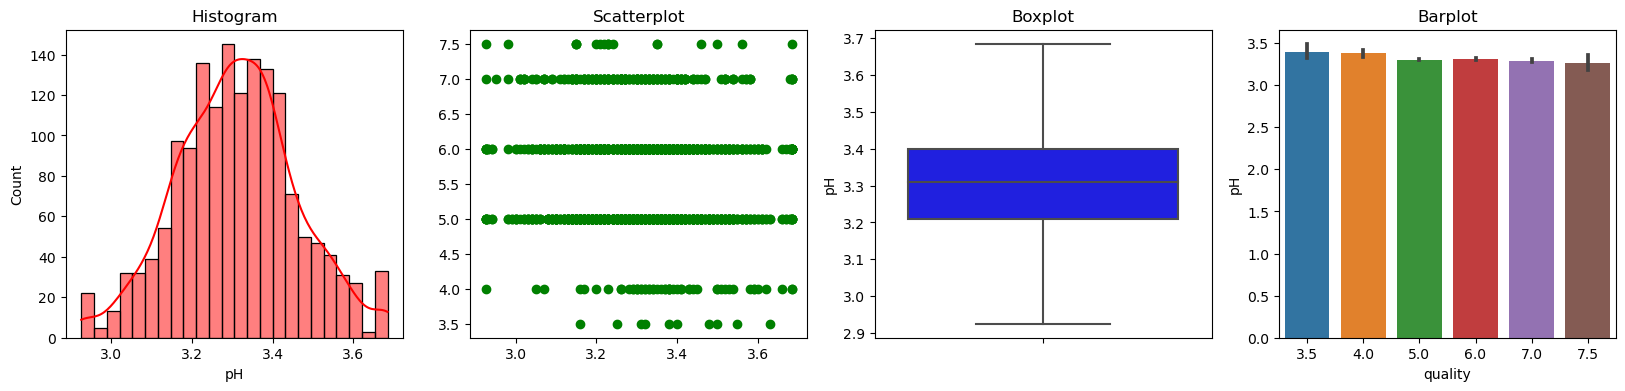

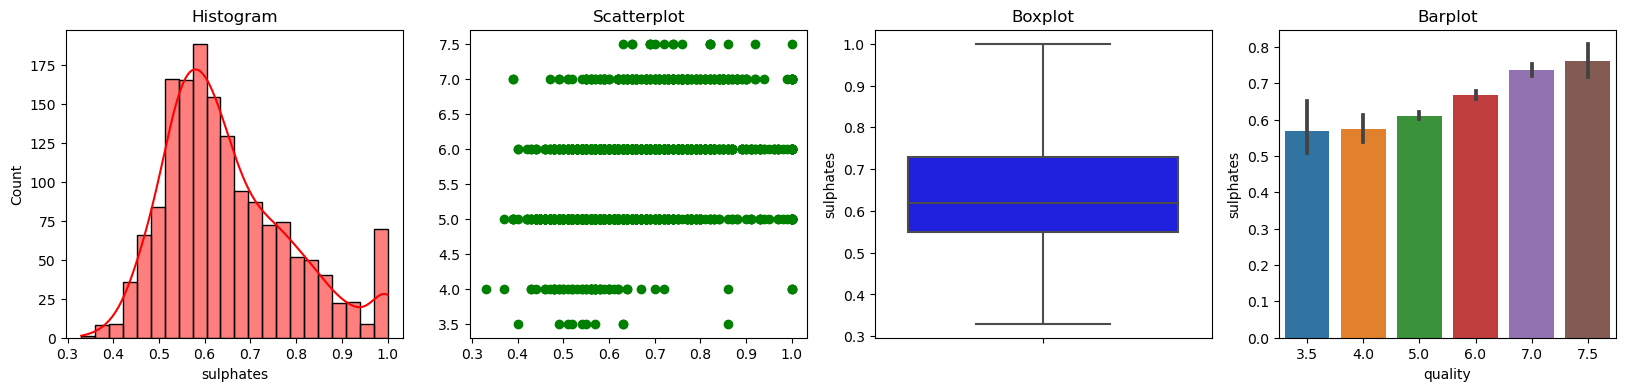

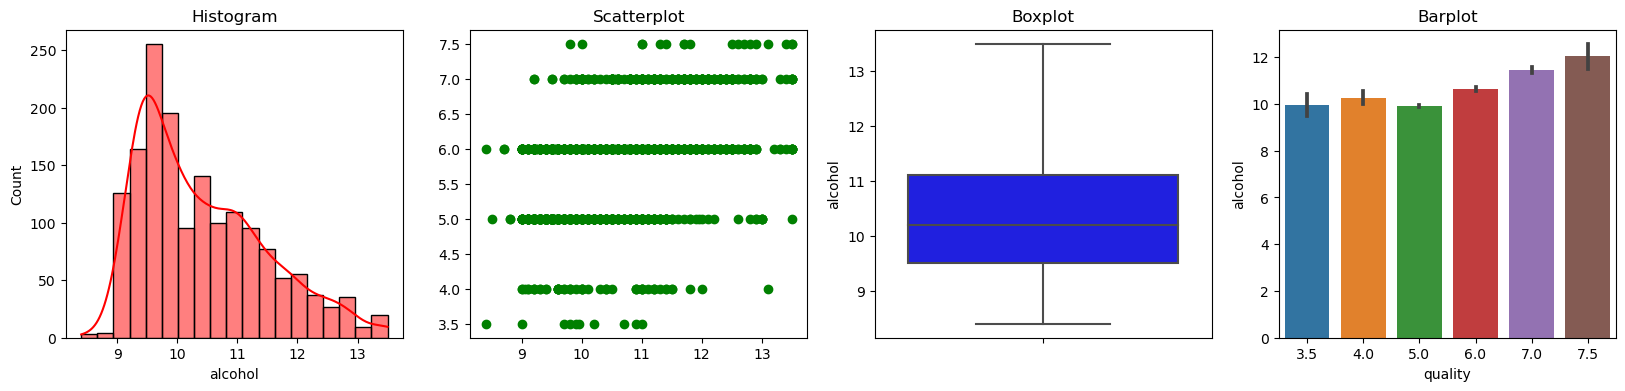

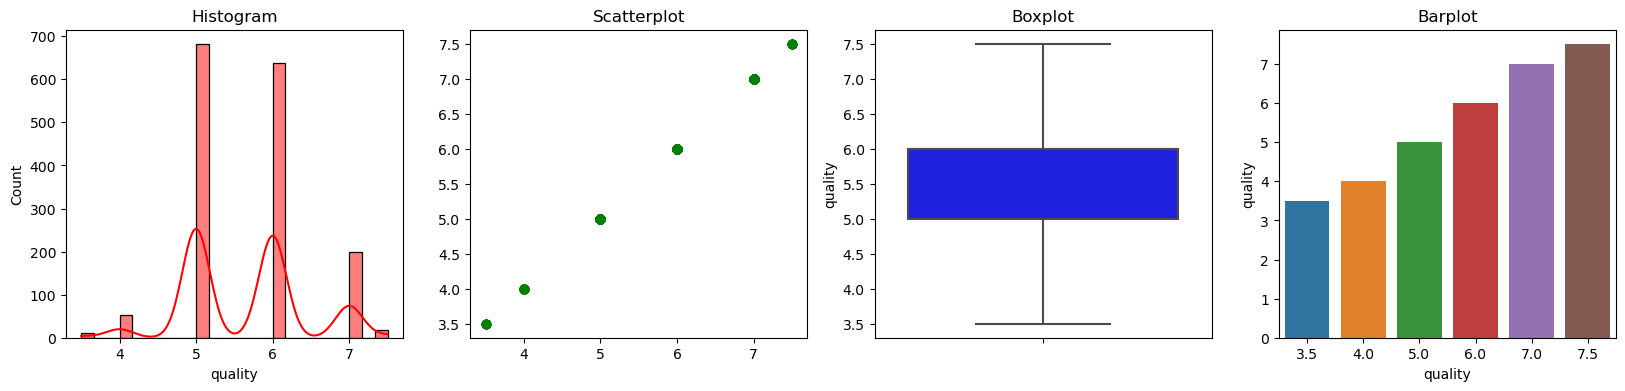

In [14]:
for col in df1:
    diagnostic_plots(df1,col,'quality')

### Drop Dupicated


In [15]:
df2=df1.drop_duplicates()

Using Log Transform For skewness

In [16]:
for col in ['fixed acidity','total sulfur dioxide','free sulfur dioxide','sulphates','alcohol']:
    df2[col]=np.log(df2[col])

C:\Users\machidi\AppData\Local\Temp\ipykernel_4212\3438059482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=np.log(df2[col])


# Corrolation

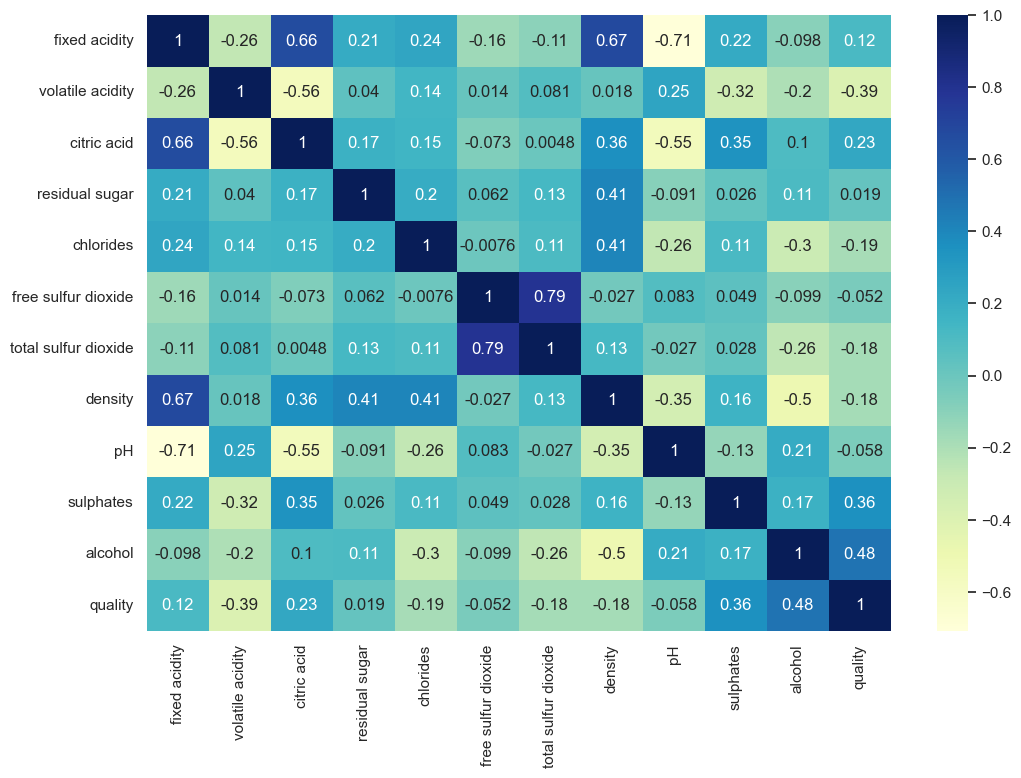

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

In [18]:
correlation = df2.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.483417
sulphates               0.355137
citric acid             0.230049
fixed acidity           0.116810
residual sugar          0.018961
free sulfur dioxide    -0.051531
pH                     -0.058199
density                -0.177360
total sulfur dioxide   -0.177391
chlorides              -0.187745
volatile acidity       -0.392559
Name: quality, dtype: float64 



### Highly correlated features:
 1. fixed acidity and citric acid 

 2. free sulphur dioxide and total sulphor dioxide

 3. fixed acidity and density

### Weakily correlated features:
 1. citric acid and volatile acidity

 2. fixed acidity and pH

 3. density and alcohol

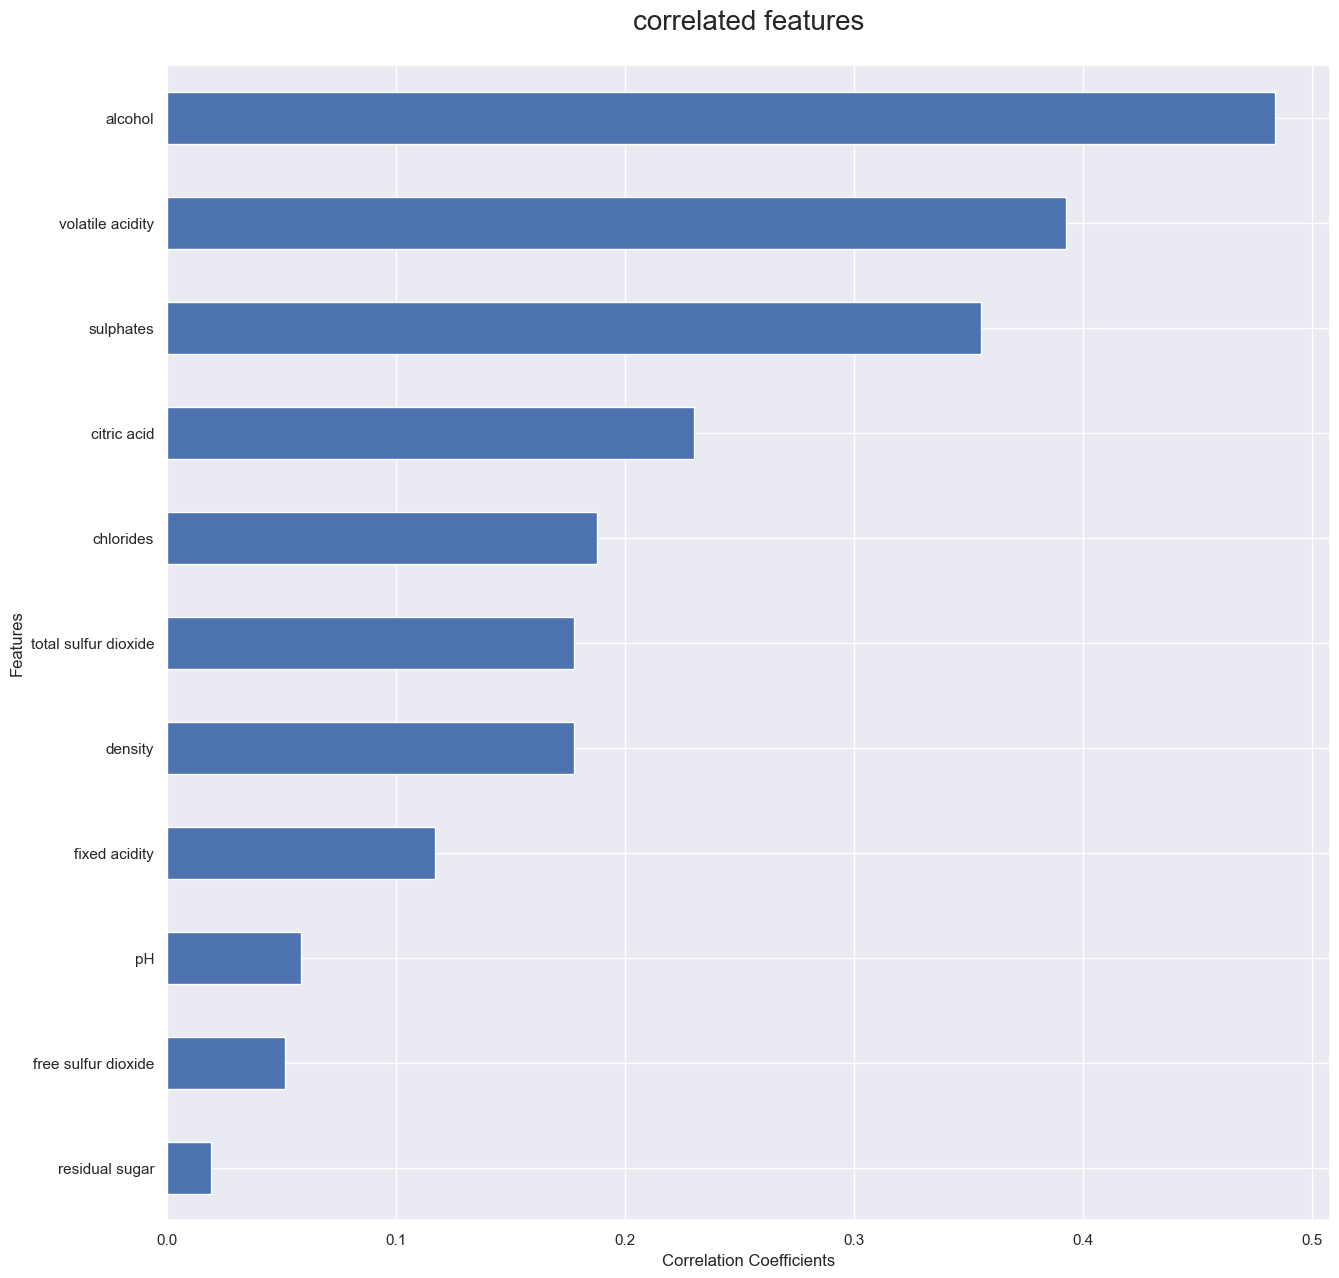

In [19]:
plt.figure(figsize=(15,15))
df2.corr()['quality'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:12][::-1].plot(kind='barh') 
plt.title("correlated features", size=20, pad=26)
plt.xlabel("Correlation Coefficients")
plt.ylabel("Features")
plt.show()

Residual Sugar being the least correlated feature .we can dropped from the dataset with code bellow.(To me is not right to drop it so i just put code for you.)

In [20]:
# features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
#                      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
#                      'sulphates', 'alcohol','quality']
# df3 =df2[features]

### Reducing the target label to only 2 labels: Bad Wine(0) & Good Wine(1)

In [21]:
#Reducing the target label to only 2 labels: Bad Wine(0) & Good Wine(1)

df3=df2.copy()
df3['quality'] = np.where(df3['quality'] >= 6.5, 1, 0)

In [22]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,0.700,0.00,1.9,0.076,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710,0
1,2.054124,0.880,0.00,2.6,0.098,3.218876,4.204693,0.99680,3.20,-0.385662,2.282382,0
2,2.054124,0.760,0.04,2.3,0.092,2.708050,3.988984,0.99700,3.26,-0.430783,2.282382,0
3,2.415914,0.280,0.56,1.9,0.075,2.833213,4.094345,0.99800,3.16,-0.544727,2.282382,0
5,2.001480,0.660,0.00,1.8,0.075,2.564949,3.688879,0.99780,3.51,-0.579818,2.240710,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,1.916923,0.620,0.08,1.9,0.068,3.332205,3.637586,0.99651,3.42,-0.198451,2.251292,0
1594,1.824549,0.600,0.08,2.0,0.090,3.465736,3.784190,0.99490,3.45,-0.544727,2.351375,0
1595,1.774952,0.550,0.10,2.2,0.062,3.663562,3.931826,0.99512,3.52,-0.274437,2.415914,0
1597,1.774952,0.645,0.12,2.0,0.075,3.465736,3.784190,0.99547,3.57,-0.342490,2.322388,0


### Splitting data into features(X) and targets(y)

In [23]:
X = df3.drop('quality', axis = 1).values
y = df3['quality']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1084, 11)
y_train shape: (1084,)
X_test shape: (272, 11)
y_test shape: (272,)


## Make Random Forest Model

In [25]:
clf =RandomForestClassifier(n_estimators=800,max_features=4,random_state=1)
clf= clf.fit(X_train,y_train.ravel())
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8786764705882353


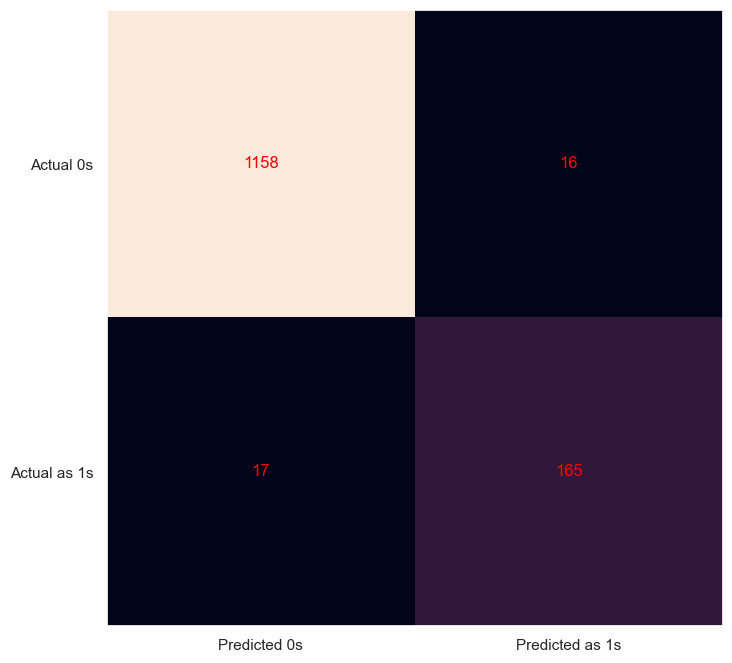

In [26]:
cm = confusion_matrix(y,clf.predict(X))

fig , ax  = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted 0s","Predicted as 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual as 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color = "red")

In [27]:
print('-'*60, '\n')
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division=1))
print('-'*60, '\n')

------------------------------------------------------------ 

Accuracy : 0.8786764705882353
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       238
           1       0.52      0.50      0.51        34

    accuracy                           0.88       272
   macro avg       0.72      0.72      0.72       272
weighted avg       0.88      0.88      0.88       272

------------------------------------------------------------ 

